
Decision Tree Model Accuracy: 100.00%


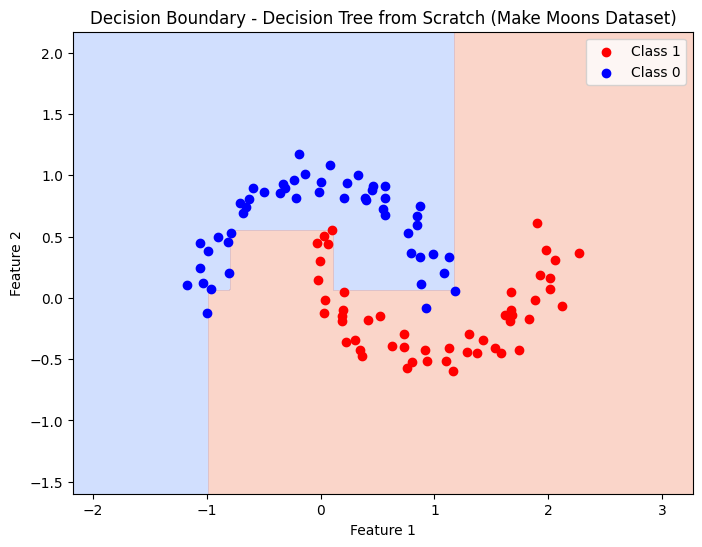

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 1. Generate Synthetic 2D Classification Data (Make Moons Dataset)
np.random.seed(42)
X, y = make_moons(n_samples=100, noise=0.1)  # Generate 2D moon-shaped data

# 2. Gini Impurity
def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return 1 - np.sum(probs ** 2)

# 3. Split Dataset
def split(X, y, feature, threshold):
    left_mask = X[:, feature] <= threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

# 4. Find the Best Split
def best_split(X, y):
    best_feat, best_thresh, best_gain = None, None, -1
    base_impurity = gini(y)
    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for t in thresholds:
            _, y_left, _, y_right = split(X, y, feature, t)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            g = base_impurity - (len(y_left)/len(y)) * gini(y_left) - (len(y_right)/len(y)) * gini(y_right)
            if g > best_gain:
                best_feat, best_thresh, best_gain = feature, t, g
    return best_feat, best_thresh

# 5. Node Class for the Tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # For leaf nodes

# 6. Build the Decision Tree
def build_tree(X, y, depth=0, max_depth=5):
    if len(np.unique(y)) == 1 or depth >= max_depth:
        value = np.argmax(np.bincount(y.astype(int)))
        return Node(value=value)
    feature, threshold = best_split(X, y)
    if feature is None:
        value = np.argmax(np.bincount(y.astype(int)))
        return Node(value=value)
    X_left, y_left, X_right, y_right = split(X, y, feature, threshold)
    left = build_tree(X_left, y_left, depth+1, max_depth)
    right = build_tree(X_right, y_right, depth+1, max_depth)
    return Node(feature, threshold, left, right)

# 7. Predict with the Tree
def predict_tree(x, node):
    if node.value is not None:
        return node.value
    if x[node.feature] <= node.threshold:
        return predict_tree(x, node.left)
    else:
        return predict_tree(x, node.right)

# 8. Train and Predict
tree = build_tree(X, y, max_depth=5)
y_pred = np.array([predict_tree(x, tree) for x in X])
accuracy = np.mean(y_pred == y)
print(f"\nDecision Tree Model Accuracy: {accuracy * 100:.2f}%")

# 9. Decision Boundary Visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = np.array([predict_tree(pt, tree) for pt in grid])
Z = preds.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm', levels=1)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.title("Decision Boundary - Decision Tree from Scratch (Make Moons Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
